In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [252]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,9]

In [253]:
data=pd.read_csv('../lectures/data/globalterrorismdb_0617dist.csv', encoding = "ISO-8859-1")

/home/szymon/anaconda3/envs/datascience/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [254]:
pd.options.display.max_rows=8

**1. Plot the number of terrorist accidents each year.**

In [255]:
group_by_year = data.groupby('iyear')

In [256]:
len(group_by_year)

46

In [257]:
sum_years = group_by_year.apply(lambda g: len(g))

In [258]:
sum_years

iyear
1970      651
1971      470
1972      496
1973      473
        ...  
2013    11996
2014    16860
2015    14852
2016    13488
Length: 46, dtype: int64

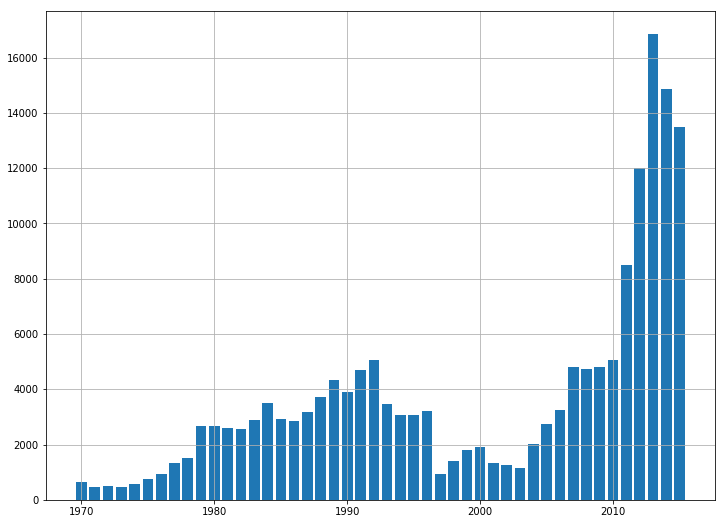

In [259]:
min_year = data['iyear'].argmin()
max_year = data['iyear'].argmax()
min = data.iloc[min_year]
max = data.iloc[max_year]
ind = np.arange(min['iyear'], max['iyear'])
plot = plt.bar(ind, sum_years)
plt.grid()
plt.show()

**2. Make the same plot but split between Americas, Asia, Europe and Africa. Use the stacked bar plot.**

In [260]:
req_data=data[
    ['iyear', 'region']
]

In [261]:
req_data

,iyear,region
0,1970,2
1,1970,1
2,1970,5
3,1970,8
...,...,...
170346,2016,5
170347,2016,11
170348,2016,1
170349,2016,11


In [262]:
north_america = req_data.loc[req_data['region'] == 1]
na_groupped = north_america.groupby('iyear')
na_sum = na_groupped.apply(lambda g: len(g))

In [263]:
na_plot = plt.bar(ind, na_sum, 0.35, color='#ade123')

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015])